In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
d = pd.read_csv('test.csv',encoding='latin1')
f = pd.read_csv('train.csv',encoding='latin1')
df = pd.concat([d,f])

In [5]:
print(df.shape)
print(df.info())
df.head()

(10976, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 10976 entries, 0 to 6160
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            9695 non-null   object 
 1   text              9694 non-null   object 
 2   sentiment         9694 non-null   object 
 3   Time of Tweet     9694 non-null   object 
 4   Age of User       9694 non-null   object 
 5   Country           9694 non-null   object 
 6   Population -2020  9694 non-null   float64
 7   Land Area (Km²)   9694 non-null   float64
 8   Density (P/Km²)   9694 non-null   float64
 9   selected_text     6159 non-null   object 
dtypes: float64(3), object(7)
memory usage: 943.2+ KB
None


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,NaN
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,NaN
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,NaN
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,NaN
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,NaN


In [6]:
df.dropna(inplace=True)

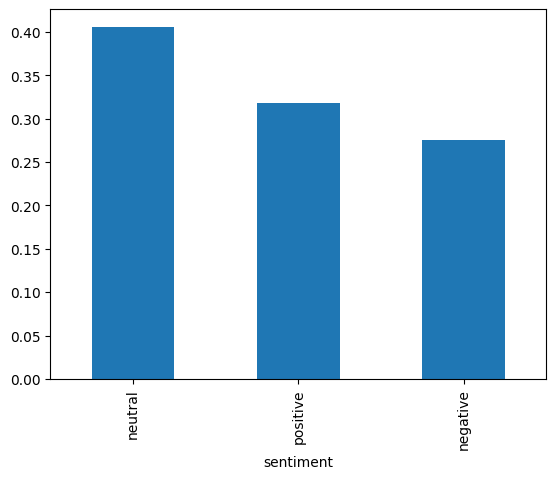

In [7]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

<Axes: xlabel='sentiment'>

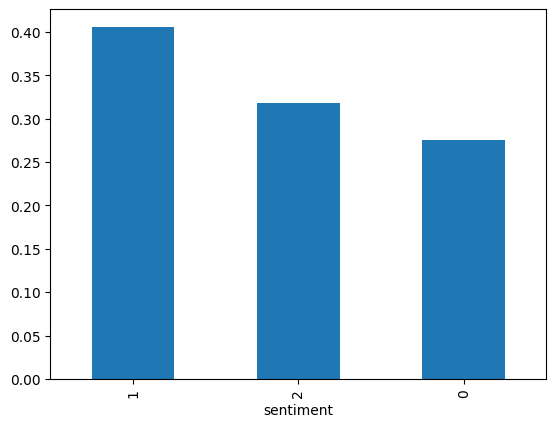

In [8]:
df['sentiment'] = df['sentiment'].astype('category').cat.codes
df['sentiment'].value_counts(normalize=True).plot(kind='bar')

In [9]:
df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

,text,sentiment,selected_text
0,"I`d have responded, if I were going",1,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!,0,Sooo SAD
2,my boss is bullying me...,0,bullying me
3,what interview! leave me alone,0,leave me alone
4,"Sons of ****, why couldn`t they put them on t...",0,"Sons of ****,"
...,...,...,...
6155,wants to cool down,2,wants to cool down
6156,Is trying to buy a new bible...but they just a...,1,Is trying to buy a new bible...but they just a...
6157,#3wordsaftersex it never started...,0,#3wordsaftersex it never started...
6158,kicking back at home,1,kicking back at home


In [10]:
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [11]:
df['selected_text'] = df["selected_text"].apply(wp)
X = df['selected_text']
y = df['sentiment']

In [12]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the text data
X_train = X_train.apply(wp)
X_test = X_test.apply(wp)

#  Convert text data into numerical features
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#  Initialize a classifier model
classifier = LogisticRegression()

#  Fit the classifier model to the training data
classifier.fit(X_train, y_train)

#  Make predictions on the testing data
y_pred = classifier.predict(X_test)

#  Evaluate the performance of the model
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.78      0.75      0.77       341
           1       0.75      0.90      0.81       495
           2       0.91      0.71      0.80       396

    accuracy                           0.80      1232
   macro avg       0.81      0.79      0.79      1232
weighted avg       0.81      0.80      0.80      1232



In [ ]:
# Define the preprocessing function
def preprocess_text(text):
    text = wp(text)
    text = vectorizer.transform([text])
    return text

user_input = input("Enter a text: ")


preprocessed_input = preprocess_text(user_input)


prediction = classifier.predict(preprocessed_input)


print("Predicted sentiment:", prediction)

